In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import zscore
from scipy.stats import boxcox

In [3]:
df_avocado=pd.read_csv('avocado.csv',index_col=0)
df_avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df_avocado.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


In [5]:
df_avocado.shape

(1517, 13)

In [7]:
df_avocado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 14
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   int64  
 12  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 165.9+ KB


In [10]:
df_avocado['Date']=pd.to_datetime(df_avocado['Date'])
#to change the datatype of 'Date' column

In [11]:
df_avocado.info()
#to check the null values and datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 14
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  year          1517 non-null   int64         
 12  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 165.9+ KB


In [12]:
#Statistical analysis of data
df_avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [15]:
df_avocado['year'].unique()

array([2015, 2016], dtype=int64)

In [16]:
df_avocado['type'].unique()

array(['conventional'], dtype=object)

In [17]:
df_avocado['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

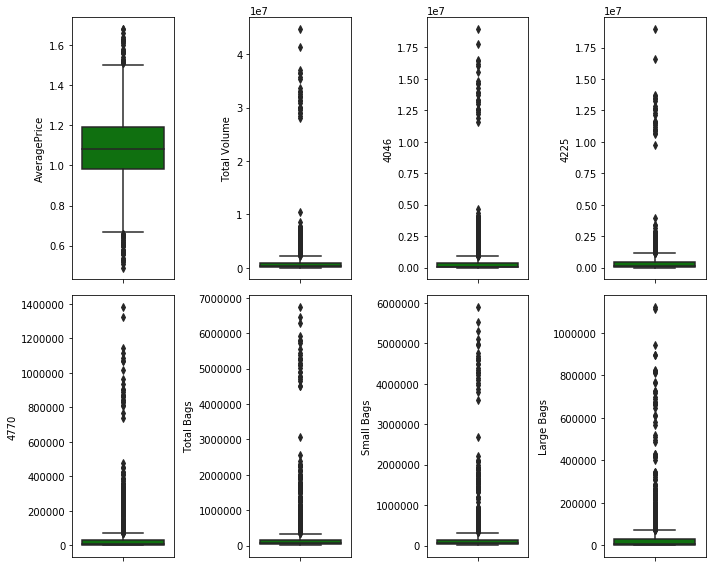

In [24]:
col_list=df_avocado.iloc[:,1:9].columns.values
plt.figure(figsize=(10,8))
for i in range(0, len(col_list)):                                      
    plt.subplot(2,4,i+1)
    sns.boxplot(df_avocado[col_list[i]], color="green", orient='v')
    plt.tight_layout()
#Boxplot to check outliers
#There are quite a lot outliers but they are not affecting the average price as much due to their weak relationship

In [27]:
df_avocado1=df_avocado.iloc[:,1:9]
from scipy.stats import zscore
z_score=abs(zscore(df_avocado1))
print(df_avocado.shape)
df_avocado1_final=df_avocado1.loc[(z_score<3).all(axis=1)]                  
print(df_avocado1_final.shape)
#to quantify the outliers

(1517, 13)
(1471, 8)


Text(0.5, 1.0, 'Average Price')

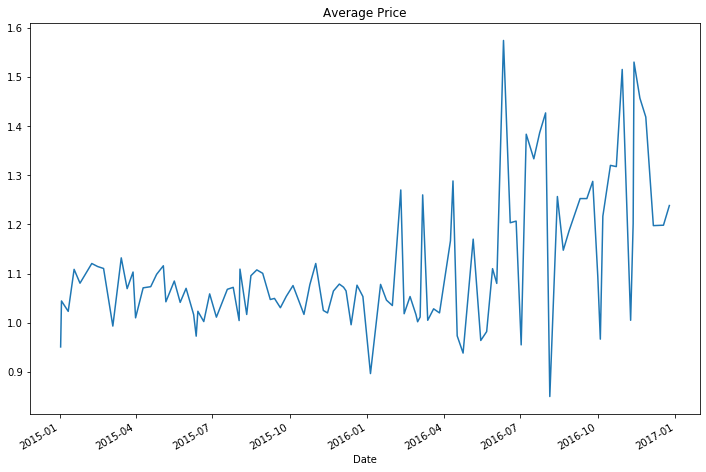

In [29]:
bydate=df_avocado.groupby('Date').mean()
plt.figure(figsize=(12,8))
bydate['AveragePrice'].plot()
plt.title('Average Price')
#Fluctuation of Average Price over periods of time

In [48]:
df_avocado_corr=df_avocado.corr()
df_avocado_corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


In [49]:
df_avocado=df_avocado[(z_score<3).all(axis=1)]
#To remove the outliers

In [50]:
df_avocado.shape

(1471, 13)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [80]:
#Splitting of data
x=df_avocado.iloc[:,2:10]
y=df_avocado['AveragePrice']
#We have removed the region column, type and year column.

In [81]:
print(x.shape)
print(y.shape)

(1471, 8)
(1471,)


In [82]:
sc = StandardScaler()
x = sc.fit_transform(x)
#scaling down using standardscalar

In [83]:
#Testing the models at random state 42 along with their r2 score
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.20)
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),RandomForestRegressor()]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(r2_score(y_test,predm))

#After the testing several models, we have found that RandomForestRegressor is giving highest r2 score at random state 42.

0.20006892285436206
0.6039264137545861
0.5175106335469106
0.7976430960793438
0.8243739409409836


In [84]:
#Now we will check at what randome state, RandomForestRegressor model will give highest r2 score.
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=RandomForestRegressor()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to ',final_r_state," is ",max_r_score)
#Max. r2 score with RandomForestRegressor model is  0.8653198868123457, which is at random state 43.

r2 score corresponding to random state:  42  is:  0.8304194439689517
r2 score corresponding to random state:  43  is:  0.8653198868123457
r2 score corresponding to random state:  44  is:  0.7999990646845633
r2 score corresponding to random state:  45  is:  0.7991509108237257
r2 score corresponding to random state:  46  is:  0.8180151267418194
r2 score corresponding to random state:  47  is:  0.8571274605908917
r2 score corresponding to random state:  48  is:  0.7863415187875809
r2 score corresponding to random state:  49  is:  0.8046127464453581
r2 score corresponding to random state:  50  is:  0.7626501858316086
r2 score corresponding to random state:  51  is:  0.8135101158977316
r2 score corresponding to random state:  52  is:  0.7991484579715624
r2 score corresponding to random state:  53  is:  0.7893371558872915
r2 score corresponding to random state:  54  is:  0.8051885624285229
r2 score corresponding to random state:  55  is:  0.7955143141089893
r2 score corresponding to random s

In [85]:
#Cross Validation of RFR
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestRegressor(),x,y,cv=5,scoring='r2').mean()

0.12587929816010848

In [86]:
#Implementing RandomForestRegressor model at random state 43
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=0.20)
rfr=RandomForestRegressor()            
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
y_pred=rfr.predict(x_test)
print(r2_score(y_test,y_pred))

0.8641133324194138


In [87]:
df_avocado_pred=pd.DataFrame(y_pred)                #To save the prediction in csv
df_avocado_pred.to_csv("Project8_Prediction.csv")